## Libs

In [4]:
import pandas as pd
import seaborn as srn
import statistics as sts

## DATABASE

In [9]:
data = pd.read_csv('Churn.csv', sep=';')
data.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [10]:
data.shape

(999, 12)

## Nomeando Colunas

In [11]:
data.columns = [
    'id', 'score', 'estado', 'genero', 'idade', 'patrimonio', 'saldo',
    'produtos', 'temcardcredito', 'ativo', 'salario', 'saiu'
]
data.tail()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0
998,1000,811,PR,Feminino,28,4,16773882,2,1,1,990342.0,0


## Agrupando e Tratando Dados

### Estados

In [14]:
estados = data.groupby(['estado']).size()
estados

estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='estado'>

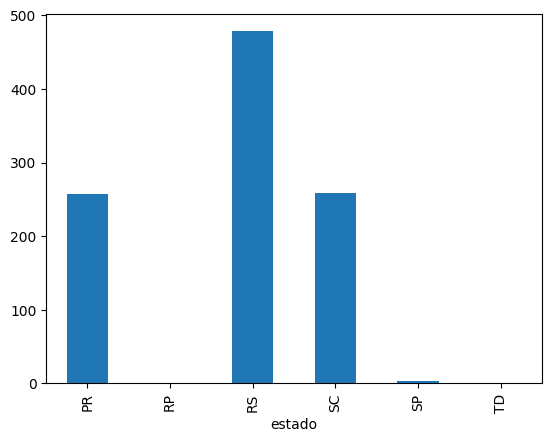

In [15]:
estados.plot.bar()